<a href="https://colab.research.google.com/github/AmiAnurag/Adult-Census-Income-Classification/blob/main/Adult_Census_Income_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Datasets/Adult census income/adult[1].csv')
data.head()
# description of data : https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.shape

(32561, 15)

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [ ]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
data.isin([' ?']).sum()
# Null values

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [ ]:
data=data.replace(' ?',np.nan)

In [ ]:
print('Continous variables in the dataset are: ')
cont=[]
for i in data.columns:
  if data[i].dtype=='int64':
    cont.append(i)
    print(i,end=', ')
print('\n\nCategorical variable in the dataset are: ')
catg=[]
for i in data.columns:
  if data[i].dtype=='O':
    catg.append(i)
    print(i,end=',  ')

Continous variables in the dataset are: 
age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week, 

Categorical variable in the dataset are: 
workclass,  education,  marital-status,  occupation,  relationship,  race,  sex,  country,  salary,  

In [ ]:
data.salary.describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: salary, dtype: object

## Univariate analysis of continous variables

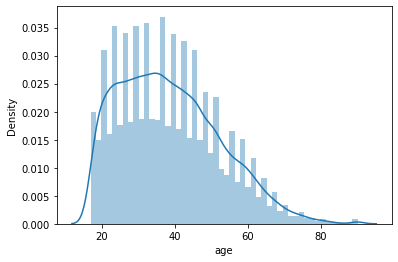

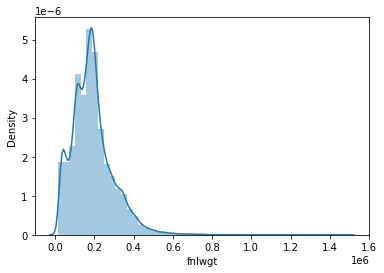

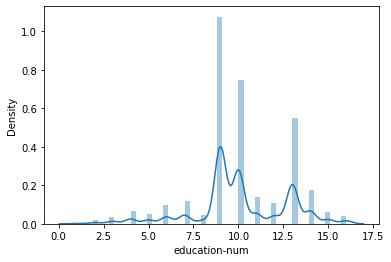

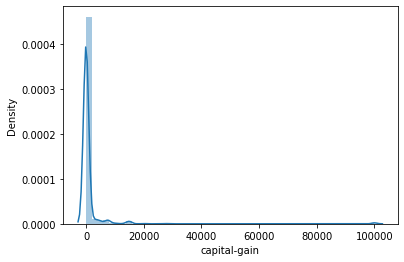

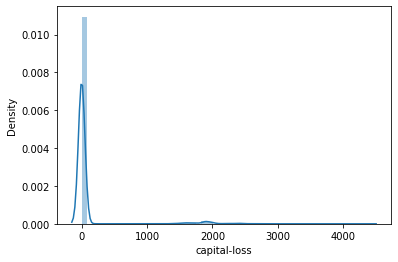

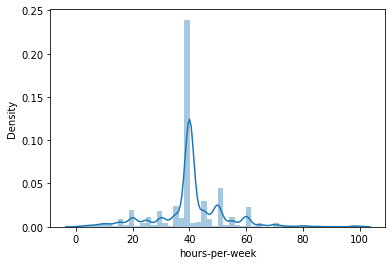

In [ ]:
for i in cont:
  sns.distplot(data[i])
  plt.show()

From the above result I can observe :
1. fnlwgt is just a census number and it is not useful for the model prediction
2. education.num is ordered-encoding of education data
3. presence of outliers in capital gain and capital loss columns

In [ ]:
data['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

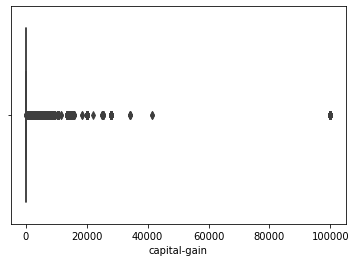

In [ ]:
sns.boxplot(data['capital-gain'])
plt.show()

In [ ]:
# data sets with high kurtosis tend to have heavy tails, or outliers. 
# Data sets with low kurtosis tend to have light tails, or lack of outliers
stats.kurtosis(data['capital-gain'])

154.7754839300255

In [ ]:
ind=data[(data['capital-gain'] < 10000 )].index

In [ ]:
stats.kurtosis(data.drop(ind)['capital-gain'])

0.03470307764437042

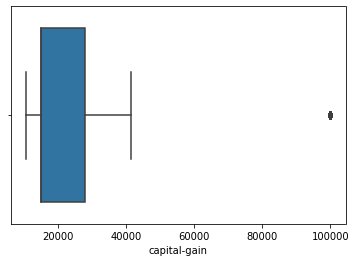

In [ ]:
sns.boxplot(data.drop(ind)['capital-gain'])

In [ ]:
data.drop(ind)['capital-gain'].shape

(770,)

If we try to treat the outliers in the capital-gain column of the dataset then we are loosing a huge data. Hence I will first try to create a model keeping the outliers watching the failure of model I will develop another outlier treatment process.

The continous variable which I am including in the final data are 
1. Age
2. education-num
3. capital-gain
4. capital-loss
5. hours-per-week

In [ ]:
cont=['age','education-num','capital-gain','capital-loss','hours-per-week']

## Univariate analysis of Categorical Variable

In [ ]:
catg

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

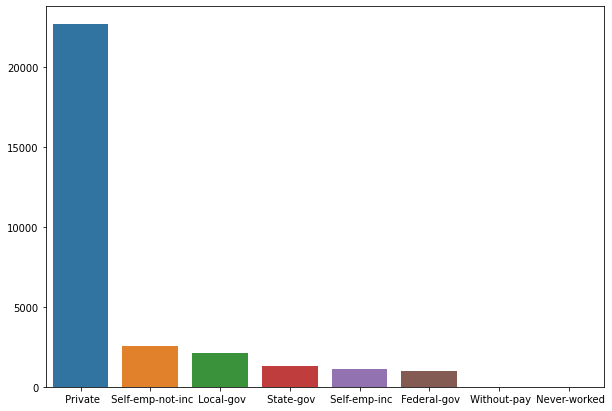

In [ ]:
plt.figure(figsize=(10,7))
grp=data['workclass'].value_counts()
sns.barplot(grp.index,grp.values)

In [ ]:
data[data['salary']==' <=50K']['workclass'].value_counts()

 Private             17733
 Self-emp-not-inc     1817
 Local-gov            1476
 State-gov             945
 Federal-gov           589
 Self-emp-inc          494
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
def catg_vis(dt,cg):
  plt.figure(figsize=(20,5))
  a=dt[dt['salary']==' <=50K'][cg].value_counts() # Below 50k salary
  b=dt[dt['salary']==' >50K'][cg].value_counts() # Above 50k salary
  plt.subplot(1,2,1)
  plt.title('Below 50K salary')
  sns.barplot(a.index,a.values)
  plt.subplot(1,2,2)
  plt.title('Above 50K salary')
  sns.barplot(b.index,b.values)
  plt.show()

workclass :



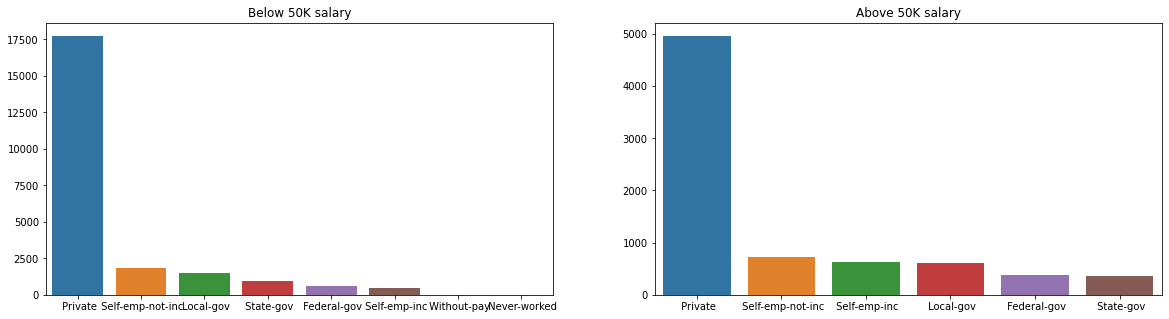

education :



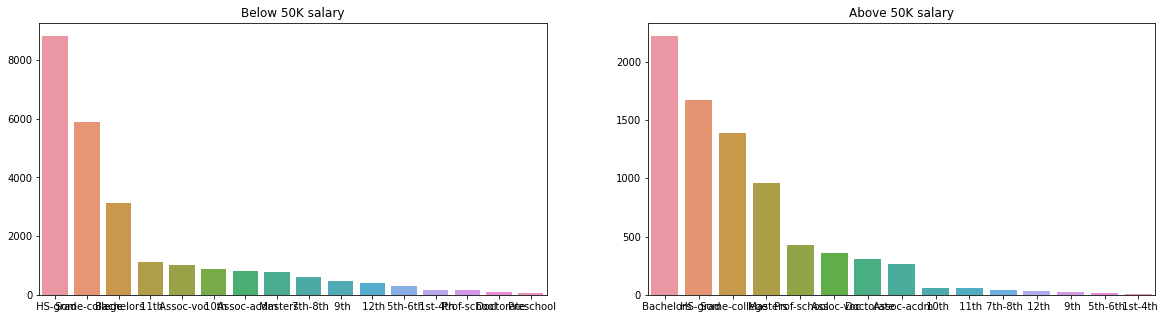

marital-status :



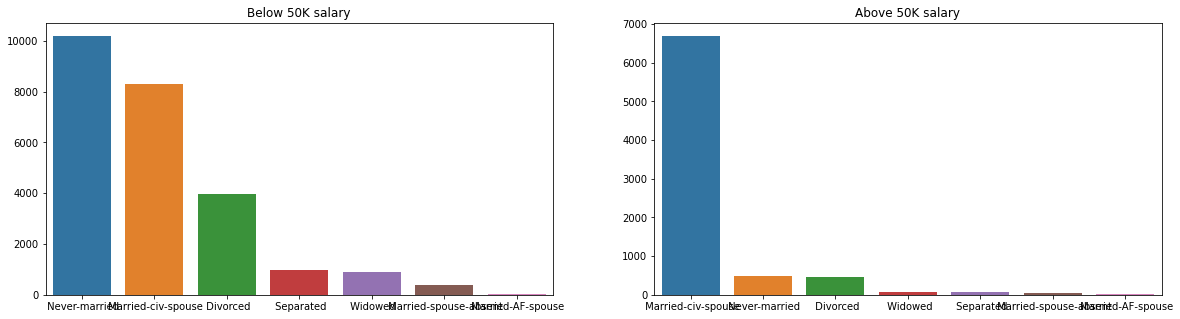

occupation :



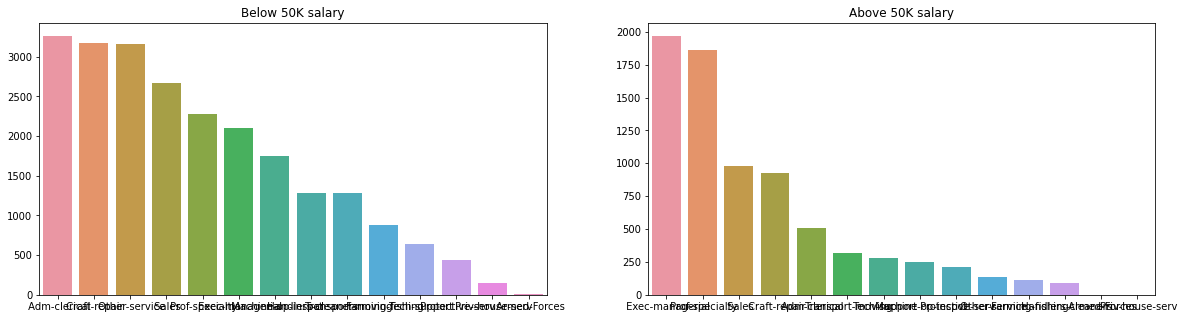

relationship :



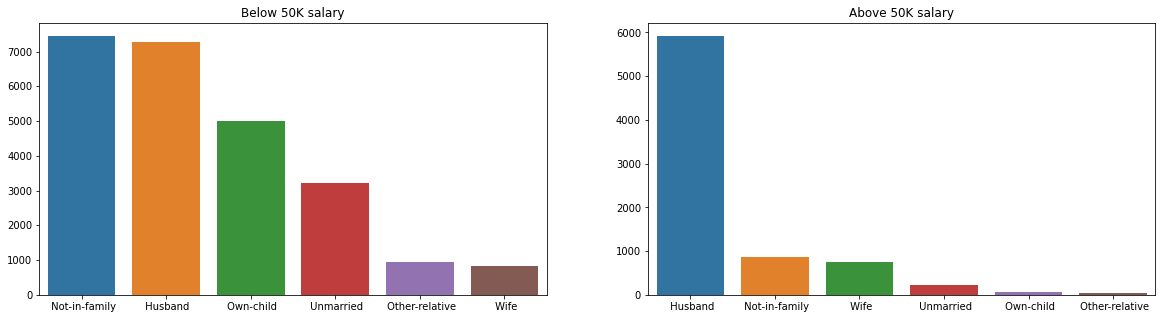

race :



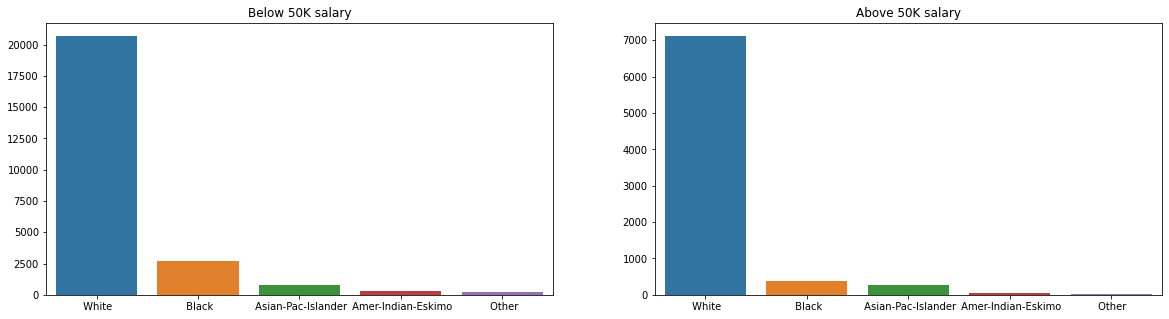

sex :



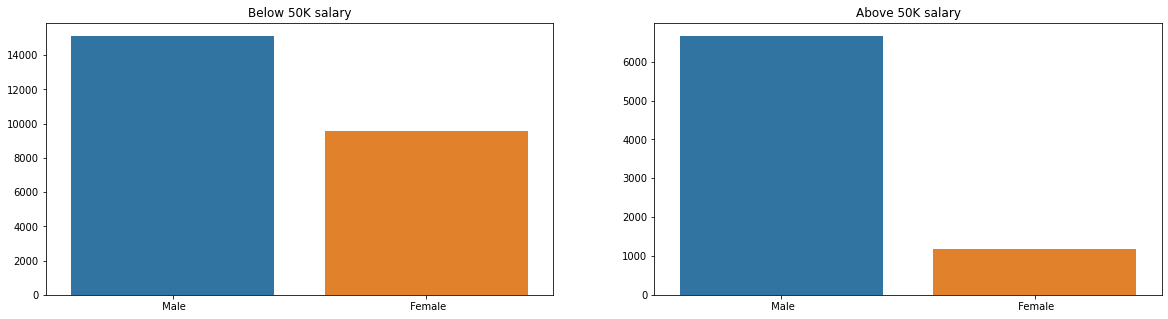

country :



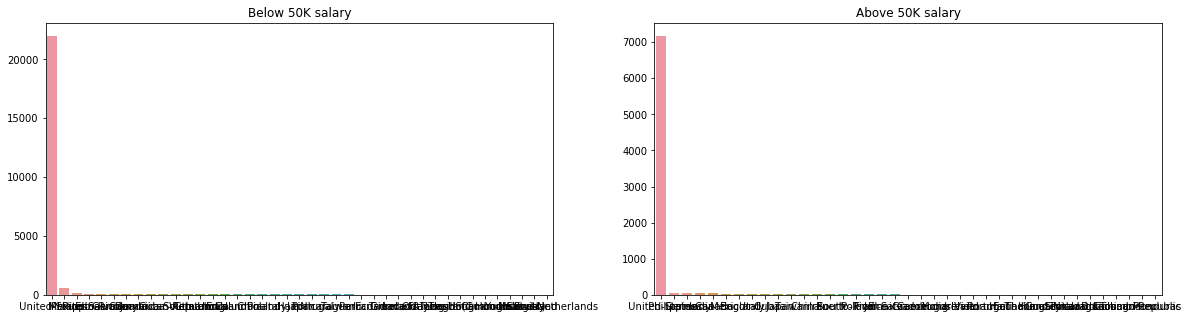

salary :



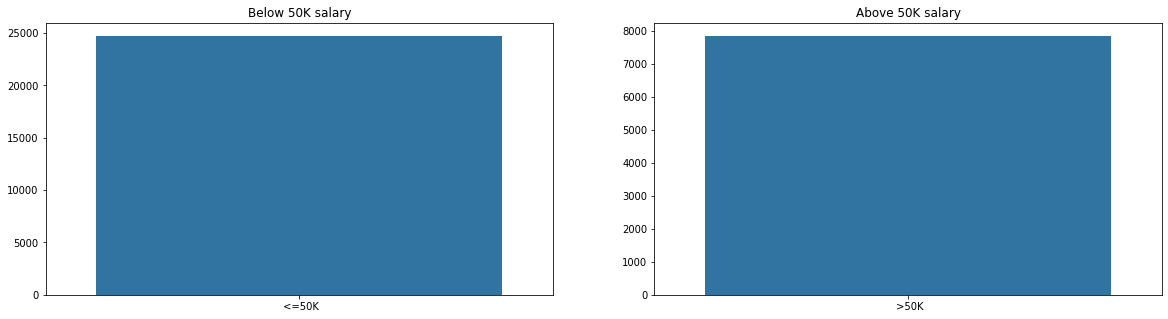

In [ ]:
for i in catg:
  print(i,':\n')
  catg_vis(data,i)

From the visualization of the categorical variables I conclude ▶
1. Drop - workclass , marital-status, relationship , country
2. Drop education as education-num (continous variable) is already present

In [ ]:
catg=['occupation','race','sex']

In [ ]:
data[cont+catg]

,age,education-num,capital-gain,capital-loss,hours-per-week,occupation,race,sex
0,39,13,2174,0,40,Adm-clerical,White,Male
1,50,13,0,0,13,Exec-managerial,White,Male
2,38,9,0,0,40,Handlers-cleaners,White,Male
3,53,7,0,0,40,Handlers-cleaners,Black,Male
4,28,13,0,0,40,Prof-specialty,Black,Female
...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,Tech-support,White,Female
32557,40,9,0,0,40,Machine-op-inspct,White,Male
32558,58,9,0,0,40,Adm-clerical,White,Female
32559,22,9,0,0,20,Adm-clerical,White,Male


**capital gain** - A capital gain is the increase in a capital asset's value and is realized when the asset is sold. Capital gains apply to any type of asset, including investments and those purchased for personal use. The gain may be short-term (one year or less) or long-term (more than one year) and must be claimed on income taxes.

**capital loss** - A capital loss is the loss incurred when a capital asset, such as an investment or real estate, decreases in value. This loss is not realized until the asset is sold for a price that is lower than the original purchase price.

In [ ]:
# analyzing capital gain and capital loss
data['capital-gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

The variance in this feature is too high, we need to use this feature in so e other way , or else it will detoriate the model

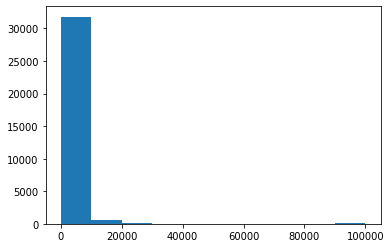

In [ ]:
plt.hist(data['capital-gain'])
plt.show()

In [ ]:
stats.skew(data['capital-gain'])

11.953296998194332

Lets try to develop a model by dropping the capital gain and loss and then observe how can it be made more accurate by using these two features


In [ ]:
for i in range(2):
    cont.pop(2)

In [ ]:
print(cont)
print('\n',catg)

['age', 'education-num', 'hours-per-week']

 ['occupation', 'race', 'sex']


In [ ]:
data[cont+catg].head()

,age,education-num,hours-per-week,occupation,race,sex
0,39,13,40,Adm-clerical,White,Male
1,50,13,13,Exec-managerial,White,Male
2,38,9,40,Handlers-cleaners,White,Male
3,53,7,40,Handlers-cleaners,Black,Male
4,28,13,40,Prof-specialty,Black,Female


## Label encoding

In [ ]:
le=LabelEncoder()
y=data['sex'].values
data['sext']=le.fit_transform(y)
y=data['occupation'].values
data['occupationt']=le.fit_transform(y)
y=data['race'].values
data['racet']=le.fit_transform(y)

data['salaryT']=le.fit_transform(data['salary'])

In [ ]:
sel_cols=['age','education-num','hours-per-week','occupationt','racet','sext']

In [ ]:
data[sel_cols].head()

,age,education-num,hours-per-week,occupationt,racet,sext
0,39,13,40,0,4,1
1,50,13,13,3,4,1
2,38,9,40,5,4,1
3,53,7,40,5,2,1
4,28,13,40,9,2,0


## Multivariate analysis

In [ ]:
for i in range(len(data['capital-gain'])):
  if data['capital-gain'][i]!=0 and data['capital-loss'][i]!=0:
    print(i)
    break
print('No such entry')

No such entry


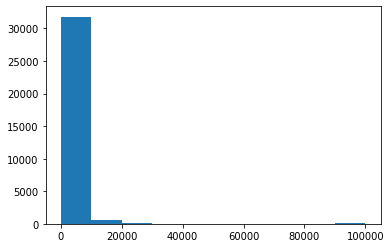

In [ ]:
plt.hist(data['capital-gain'])
plt.show()

How much loss/profit one achieves in selling his property cannot affect his/her Income slab

## Model Selection - Random Forest classifier

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data[sel_cols],data['salaryT'],test_size=0.33,random_state=42)

In [ ]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

## Accuracy

In [ ]:
confusion_matrix(y_test,y_pred)

array([[7260,  936],
       [1328, 1222]])

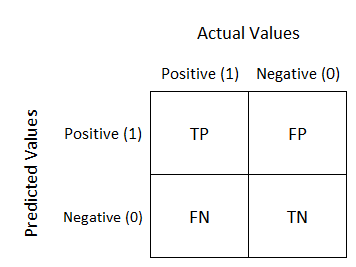

In [ ]:
print(classification_report(y_test,y_pred,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.85      0.89      0.87      8196
        >50K       0.57      0.48      0.52      2550

    accuracy                           0.79     10746
   macro avg       0.71      0.68      0.69     10746
weighted avg       0.78      0.79      0.78     10746



## 1. Feature : Age 

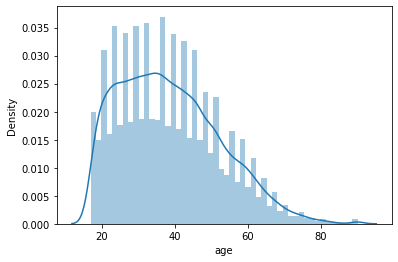

In [ ]:
sns.distplot(data['age'])

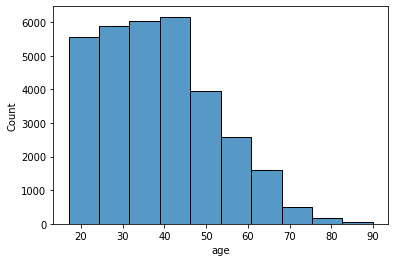

In [ ]:
sns.histplot(data['age'],bins=10)

1 : 20-30

2: 30-40

3: 40-50

4 : 50-70

5: 70+

In [ ]:
data['age_slab'] = data['age']
for i in range(len(data['age_slab'])):
  a=data['age_slab'][i]
  if a<31:
    data['age_slab'][i]=1
  elif a>=31 and a<41:
    data['age_slab'][i]=2
  elif a>=41 and a<51:
    data['age_slab'][i]=3
  elif a>=51 and a<71:
    data['age_slab'][i]=4
  elif a>=71:
    data['age_slab'][i]= 5

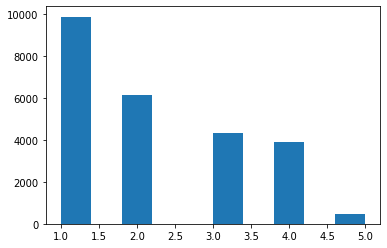

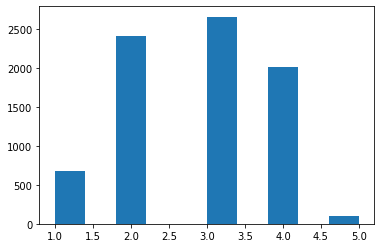

In [ ]:
plt.hist(data[data['salary']==' <=50K']['age_slab'])
plt.show()
plt.hist(data[data['salary']==' >50K']['age_slab'])
plt.show()

In [ ]:
sel_cols[0]+='_slab'
data[sel_cols].head()

,age_slab,education-num,hours-per-week,occupationt,racet,sext
0,2,13,40,0,4,1
1,3,13,13,3,4,1
2,2,9,40,5,4,1
3,4,7,40,5,2,1
4,1,13,40,9,2,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data[sel_cols],data['salaryT'],test_size=0.33)
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[7307,  821],
       [1399, 1219]])

In [ ]:
print(classification_report(y_test,y_pred,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.84      0.90      0.87      8128
        >50K       0.60      0.47      0.52      2618

    accuracy                           0.79     10746
   macro avg       0.72      0.68      0.70     10746
weighted avg       0.78      0.79      0.78     10746



## 2. Feature : hours-per-week

In [ ]:
data[sel_cols].head()

,age_slab,education-num,hours-per-week,occupationt,racet,sext
0,2,13,40,0,4,1
1,3,13,13,3,4,1
2,2,9,40,5,4,1
3,4,7,40,5,2,1
4,1,13,40,9,2,0


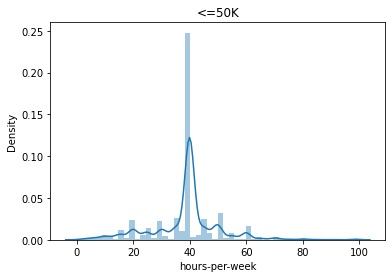

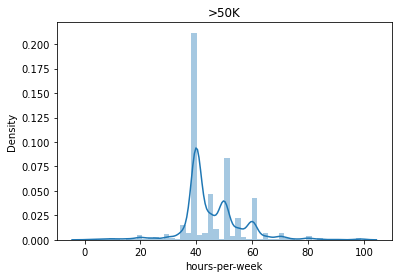

In [ ]:
sns.distplot(data[data['salary']==' <=50K']['hours-per-week'])
plt.title('<=50K')
plt.show()
sns.distplot(data[data['salary']==' >50K']['hours-per-week'])
plt.title('>50K')
plt.show()

In [ ]:
print(data.groupby(by=['salary'])['hours-per-week'].mean())
data.groupby(by=['salary'])['hours-per-week'].median()

salary
 <=50K    38.840210
 >50K     45.473026
Name: hours-per-week, dtype: float64


salary
 <=50K    40.0
 >50K     40.0
Name: hours-per-week, dtype: float64

In [ ]:
# mode=3median-2mean
# mode : <=50K : 3*40 - 2*38.84 : 42.3199
#        >50K : 3*40 - 2*45.47  : 29.06

## 3. Feature : Race

In [ ]:
df=pd.DataFrame(data.groupby(['race'])['salary'].value_counts())
df

salary
race                salary        
 Amer-Indian-Eskimo  <=50K     275
                     >50K       36
 Asian-Pac-Islander  <=50K     763
                     >50K      276
 Black               <=50K    2737
                     >50K      387
 Other               <=50K     246
                     >50K       25
 White               <=50K   20699
                     >50K     7117

In [ ]:
print('% of employed people of the mentioned race who earns below 50K')
for i in range(0,len(df.salary),2):
  print(round(df.salary[i]/(df.salary[i]+df.salary[i+1]),3)*100)

% of employed people of the mentioned race who earns below 50K
88.4
73.4
87.6
90.8
74.4


## 3. Feature : Sex

In [ ]:
data.groupby(['sex'])['salary'].value_counts() #89% female earn below 50K and 69% men earn below 50K

sex      salary
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
Name: salary, dtype: int64

## Model Selection
1. Logistic Regression -It is based on log regularized logistic regression. It minimizes log probability.
2. SGD classifier- This is a linear classifier that minimizes the cost function using stochastic gradient descent.
3. Logistic Regression CV -logistic regression with builtin cross validation
4. Naive Bayes
    1. Gaussian Nave Bayes --implemet when likelihood of features are gaussian
    2. Multinomial Naive Bayes --multinomially distributed data
    3. Complement Naive Bayes --works on imbalenced multinomially distributed data set
    4. Bernoulli Naive Bayes --works for multivariate bernoulli distributed data
    5. Categorical Naive Bayes -- for categorically distributed data
    6. Out of core naive bayes model fitting -- for large classification problem

  
      *note :-> Bernoulli:Binomial::Categorical:Multinomial*

5. Nearest Neighbor -- do scaling before fitting the data , good for small dataset.
6. Support vector classifier
7. Gaussian classififer
8. Decision Tree
9. Random forest
10. Ada boost
11. Neural Net
12. QDA

*https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html*

In [ ]:
X_train.head()

,age_slab,education-num,hours-per-week,occupationt,racet,sext
31450,4,14,40,9,4,1
15801,2,11,50,2,4,1
6513,1,13,40,11,4,1
11717,3,13,40,3,2,1
23338,1,9,40,2,4,1


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      9266
           1       0.37      0.66      0.48      1480

    accuracy                           0.80     10746
   macro avg       0.66      0.74      0.68     10746
weighted avg       0.86      0.80      0.82     10746



In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
model=SGDClassifier()
scaler=StandardScaler()
v=scaler.fit_transform(X_train)
model.fit(v,y_train)
v2=scaler.fit_transform(X_test)
y_pred=model.predict(v2)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      8566
           1       0.49      0.59      0.53      2180

    accuracy                           0.79     10746
   macro avg       0.69      0.72      0.70     10746
weighted avg       0.81      0.79      0.80     10746



In [ ]:
from sklearn.linear_model import LogisticRegressionCV
model=LogisticRegressionCV(cv=5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      9267
           1       0.37      0.66      0.48      1479

    accuracy                           0.80     10746
   macro avg       0.66      0.74      0.68     10746
weighted avg       0.86      0.80      0.82     10746



In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      8128
           1       0.49      0.01      0.01      2618

    accuracy                           0.76     10746
   macro avg       0.62      0.50      0.44     10746
weighted avg       0.69      0.76      0.65     10746



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
model=KNeighborsClassifier()
model.fit(scaler.fit_transform(X_train),y_train)
y_pred=model.predict(scaler.fit_transform(X_test))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      8128
           1       0.58      0.47      0.52      2618

    accuracy                           0.79     10746
   macro avg       0.71      0.68      0.69     10746
weighted avg       0.78      0.79      0.78     10746



In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(scaler.fit_transform(X_train),y_train)
y_pred=model.predict(scaler.fit_transform(X_test))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      8128
           1       0.69      0.36      0.48      2618

    accuracy                           0.81     10746
   macro avg       0.76      0.66      0.68     10746
weighted avg       0.79      0.81      0.78     10746



In [ ]:
# failing due to less ram
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# model=GaussianProcessClassifier(kernel=1.0*RBF(1.0))
# model.fit(X_train,y_train)
# y_pred=model.predict(X_test)
# print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      8128
           1       0.58      0.44      0.50      2618

    accuracy                           0.78     10746
   macro avg       0.70      0.67      0.68     10746
weighted avg       0.77      0.78      0.77     10746



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=100)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      8128
           1       0.68      0.44      0.54      2618

    accuracy                           0.81     10746
   macro avg       0.76      0.69      0.71     10746
weighted avg       0.80      0.81      0.80     10746

Confusion matrix
 [[7584  544]
 [1462 1156]]


In [ ]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      8128
           1       0.71      0.37      0.48      2618

    accuracy                           0.81     10746
   macro avg       0.77      0.66      0.68     10746
weighted avg       0.80      0.81      0.79     10746



In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model=QuadraticDiscriminantAnalysis()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      8128
           1       0.62      0.47      0.53      2618

    accuracy                           0.80     10746
   macro avg       0.73      0.69      0.70     10746
weighted avg       0.79      0.80      0.79     10746



### Hyperparameter tuning - Adaboost Classifier
1. base_estimator
2. n_estimator
3. learning rate
4. algorithm

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimator=[int(i) for i in range(80,100)]
learning_rate=[int(i) for i in range(-5,5)]
alg=['SAMME', 'SAMME.R']
random_grid={'n_estimators':n_estimator,
             'learning_rate':learning_rate,
             'algorithm':alg
             }
print(random_grid)

{'n_estimators': [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'learning_rate': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4], 'algorithm': ['SAMME', 'SAMME.R']}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(random_state=42)
model_tuned=RandomizedSearchCV(estimator=model,param_distributions=random_grid,n_iter=100,cv=3,verbose=100,random_state=42,n_jobs=-1)
model_tuned.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [-5, -4, -3, -2, -1, 0,
                                                          1, 2, 3, 4],
                                        'n_estimators': [80, 81, 82, 83, 84, 85,
                                                         86, 87, 88, 89, 90, 91,
                                                         92, 93, 94, 95, 96, 97,
                                                         98, 99]},
                   random_state=42, verbose=100)

In [ ]:
model_tuned.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 89}

In [ ]:
from sklearn.model_selection import GridSearchCV
model_tuned2=GridSearchCV(estimator=model,param_grid=random_grid,cv=3,verbose=100,n_jobs=-1)
model_tuned2.fit(X_train,y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4],
                         'n_estimators': [80, 81, 82, 83, 84, 85, 86, 87, 88,
                                          89, 90, 91, 92, 93, 94, 95, 96, 97,
                                          98, 99]},
             verbose=100)

In [ ]:
model_tuned2.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 99}

In [ ]:
model=AdaBoostClassifier(algorithm= 'SAMME.R', learning_rate= 1, n_estimators= 81)#fitting the best paramaters
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      8128
           1       0.68      0.44      0.54      2618

    accuracy                           0.81     10746
   macro avg       0.76      0.69      0.71     10746
weighted avg       0.80      0.81      0.80     10746

Confusion matrix
 [[7572  556]
 [1456 1162]]


In [ ]:
print(pd.DataFrame(y_pred).value_counts())
print(pd.DataFrame(y_test).value_counts())

0    9028
1    1718
dtype: int64
salaryT
0          8128
1          2618
dtype: int64


## Execution

In [ ]:
import pickle
with open('/content/drive/MyDrive/Datasets/Adult census income/income_pred_model.pkl', 'wb') as fh:
   pickle.dump(model, fh)

In [ ]:
edu_dc={}
c=0
for i in data.education.value_counts().index:
  edu_dc[i]=data['education-num'].value_counts().index[c]
  c+=1

In [ ]:
occ_dc={}
c=0
for i in data.occupation.value_counts().index:
  occ_dc[i]=data['occupationt'].value_counts().index[c]
  c+=1

In [ ]:
race_dc={}
c=0
for i in data.race.value_counts().index:
  race_dc[i]=data['racet'].value_counts().index[c]
  c+=1

{' Amer-Indian-Eskimo': 0,
 ' Asian-Pac-Islander': 1,
 ' Black': 2,
 ' Other': 3,
 ' White': 4}

In [ ]:
sex_dc={}
c=0
for i in data.sex.value_counts().index:
  sex_dc[i]=data['sext'].value_counts().index[c]
  c+=1

{' Female': 0, ' Male': 1}

In [ ]:
import pickle
model=pickle.load(open('/content/drive/MyDrive/Datasets/Adult census income/income_pred_model.pkl','rb'))
print('Enter the details to predict about the income slab')
age=input('Enter Age ')
edu=input('Enter education')
hpw=input('Enter hours of work per week ')
occ=input('Enter Occupation')
rac=input('Enter race ')
sex=input('Enter Sex ')

age=int(age)
if age<31:
    age_slab=1
elif age>=31 and age<41:
    age_slab=2
elif age>=41 and age<51:
    age_slab=3
elif age>=51 and age<71:
    age_slab=4
elif age>=71:
    age_slab= 5

education=edu_dc[f' {edu}']
hpw=int(hpw)
occup=occ_dc[f' {occ}']
race=race_dc[f' {rac}']
sx=sex_dc[f' {sex}']

p=model.predict([[age_slab,education,hpw,occup,race,sx]])
if p==1:
  print('Status of Income is above 50K')
if p==0:
  print('\nStatus of income is below 50K')

Enter the details to predict about the income slab
Enter Age 39
Enter educationBachelors
Enter hours of work per week 43
Enter OccupationAdm-clerical
Enter race White
Enter Sex Female
Status of income is below 50K
